In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pylab import rcParams

In [3]:
#Style-settings for Notebook
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
%matplotlib inline

## Nous regardons le journal de Webserver

In [4]:
#My names for the 6 fields of this logfile. I have no idea what number1 and number2 are supposed to be
cols = ['date', 'time','resource','number1','number2','ip_source']

#### ca me manque mes jours commen un sysadmin

In [ ]:
!echo You can do it again if you want. Just uncomment this line
#!awk 'BEGIN { FS = OFS = "\t" } { for(i=1; i<=NF; i++) if($i ~ /^ *$/) $i = 0 }; 1' anonymized-curriculum-access.txt > crap.txt

#!awk '{print $1 " " $2 "," $3 "," $4 "," $5 "," $6}' crap.txt > crapGood.txt

In [5]:
cols2 = ['datetime','resource','number1','number2','ip_source']
schmutz = pd.read_csv('crapGood.txt', names=cols2, parse_dates = [0], index_col = [0])

In [6]:
schmutz.info()
#merde

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 4 columns):
resource     399195 non-null object
number1      399195 non-null int64
number2      398890 non-null object
ip_source    372746 non-null object
dtypes: int64(1), object(3)
memory usage: 15.2+ MB


#### maudire ces valeures nulles! Mon AWK code est trop vieux pour cette tache´

In [7]:
#We can convince Pandas it's a CSV if we tell it the C is a blank space
#blob = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', names=cols, parse_dates = [0], index_col = [0])
blob = pd.read_csv('anonymized-curriculum-access.txt.ORIG', sep=' ', names=cols)

In [8]:
#Cleaning up the time data.
Date = blob['date'] + ' ' + blob['time']
Date = pd.to_datetime(Date)
blob['Date'] = Date
blob.drop(['date','time'],axis=1,inplace=True)
blob.set_index('Date',inplace=True)
df = blob
#df = schmutz

In [ ]:
df.info()

In [74]:
df

,resource,number1,number2,ip_source
Date,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61


#### Looks like there is one column with some nulls. Maybe that's significant.

In [11]:
df.number2.isnull().sum()

26754

#### Lets see if there's anything that jumps out about these null values in the number2 column

In [12]:
df[df.number2.isnull()].ip_source.nunique()

240

In [13]:
df[df.number2.isnull()].number1.unique()
#There looks to be a a few consecutive streaks in there.

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429])

In [15]:
df[df.number2.isnull()].ip_source.nunique()

240

In [17]:
df[df.number2.isnull()].resource.unique()

array(['/', 'spring/extra-features/form-validation',
       'mysql/relationships/joins', 'mysql/tables', 'mysql/databases',
       'mysql/relationships', 'mysql/database-design',
       'mysql/relationships/indexes', 'spring/fundamentals/relationships',
       'spring/extra-features/error-pages',
       'spring/extra-features/json-response',
       'spring/extra-features/file-upload', 'spring/extra-features',
       'spring/fundamentals/security/authentication',
       'appendix/further-reading/spring/authorization',
       'appendix/further-reading/spring/security-use-cases',
       'mysql/sample-database', 'mysql/intellij', 'mysql/users',
       'mysql/basic-statements', 'html-css/elements',
       'mkdocs/search_index.json', 'appendix/capstone-workbook',
       'git/intellij-intro', 'jquery/resume-portfolio', 'java-ii',
       'java-ii/interfaces-and-abstract-classes',
       'slides/interfaces_and_abstract_classes', 'html-css',
       'javascript-i', 'javascript-i/conditionals',
  

Whatever number 2 represents, theres 31 of them.

In [18]:
df.number2.nunique()

31

The relationship between mystery number 1 and 2 shows some predictability.

In [19]:
blob.groupby('number2')['number1'].nunique()

number2
1.0     18
2.0      3
4.0      1
6.0      2
7.0      6
8.0      4
9.0      1
11.0     5
12.0     4
13.0    10
14.0    10
15.0     5
16.0     8
17.0    12
18.0    13
19.0    16
21.0    28
22.0    35
23.0    33
24.0    33
25.0    26
26.0    20
27.0    28
28.0    19
29.0    25
31.0    28
32.0    20
33.0    29
34.0    22
51.0    25
52.0    27
Name: number1, dtype: int64

Starts high, then hovers in the 1-10 range, then jumps to 20-30, then gets very consistent

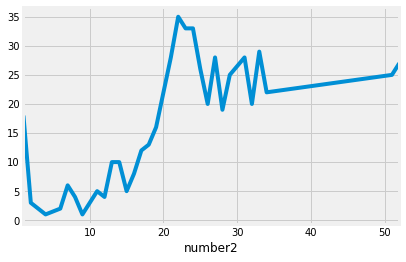

In [20]:
blob.groupby('number2')['number1'].nunique().plot()
plt.show()

# Lets find the normal, so we can see what's an anomaly

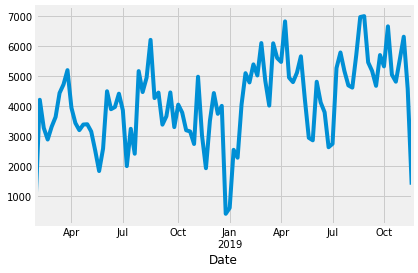

In [24]:
#The traffic on a weekly basis
df.resample('W')['ip_source'].count().plot()
#df.resample('W')['ip_source'].nunique().plot()
plt.show()

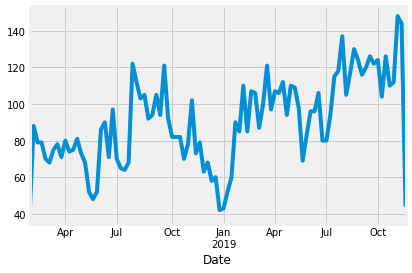

In [22]:
#Unique IPs connecting to the curriculum
df.resample('W')['ip_source'].nunique().plot()
plt.show()

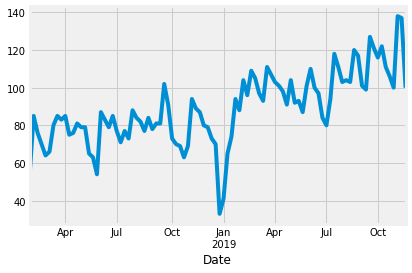

In [25]:
#Number 1
df.resample('W')['number1'].nunique().plot()
plt.show()

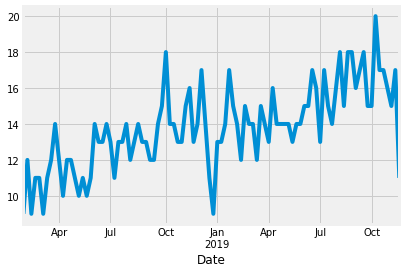

In [26]:
#Number2
df.resample('W')['number2'].nunique().plot()
plt.show()

In [27]:
#Each week has about 4158 hits per week
df.resample('W')['ip_source'].count().mean()

4158.28125

In [28]:
#About 90 unique connections to the curriculum per week
df.resample('W')['ip_source'].nunique().mean()

90.27083333333333

In [32]:
#The top twelve most common clients' IP address
df.groupby('ip_source').count().sort_values('resource',ascending=False).head(12)

,resource,number1,number2
ip_source,,,
97.105.19.58,227220,227220,211289
97.105.19.61,61662,61662,60530
192.171.117.210,8127,8127,7791
70.122.40.62,1338,1338,1338
66.69.108.117,1199,1199,1199
173.174.211.206,1019,1019,1019
108.65.244.91,1007,1007,1007
170.248.173.245,997,997,952
67.11.157.190,972,972,968


In [29]:
!traceroute 8.8.8.8

traceroute to 8.8.8.8 (8.8.8.8), 64 hops max, 52 byte packets
 1  10.10.1.1 (10.10.1.1)  4.069 ms  0.827 ms  0.654 ms
 2  97.105.19.57 (97.105.19.57)  7.932 ms  2.819 ms  5.353 ms
 3  ae15.snantxvy01h.sw.twcbiz.com (97.77.3.210)  3.274 ms  10.172 ms  13.485 ms
 4  agg60.snantxvy01r.texas.rr.com (24.175.33.208)  17.524 ms  17.768 ms  16.804 ms
 5  agg23.dllatxl301r.texas.rr.com (24.175.32.146)  21.284 ms  24.940 ms
    agg10-10.snavtxuu02r.texas.rr.com (24.175.32.149)  17.525 ms
 6  agg23.hstqtxl301r.texas.rr.com (24.175.32.156)  19.084 ms
    agg10.hstqtxl301r.texas.rr.com (24.175.52.61)  26.088 ms
    agg23.hstqtxl301r.texas.rr.com (24.175.32.156)  15.314 ms
 7  bu-ether16.hstqtx0209w-bcr00.tbone.rr.com (66.109.6.108)  38.034 ms
    ae-1-0.p0.atl90.tbone.rr.com (66.109.1.218)  21.533 ms  14.257 ms
 8  bu-ether12.dllstx976iw-bcr00.tbone.rr.com (66.109.6.39)  17.945 ms  18.017 ms
    107.14.19.49 (107.14.19.49)  31.725 ms
 9  66.109.5.121 (66.109.5.121)  16.940 ms  19.982 ms  15.757 ms


97.105.19.X is traffic from the Codeup Router

In [30]:
local_traffic = df[(df.ip_source == '97.105.19.58') | (df.ip_source =='97.105.19.61')]

In [31]:
outside_traffic = df[(df.ip_source != '97.105.19.58') | (df.ip_source != '97.105.19.61')]

Looks like the traffic getting to the curricullum is paired. No real diffenrences between them

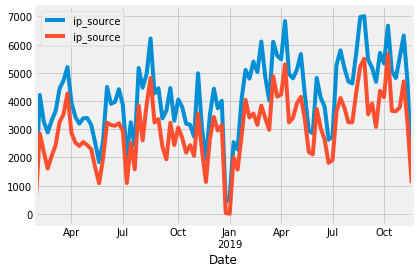

In [42]:
outside_traffic.resample('W')['ip_source'].count().plot()
local_traffic.resample('W')['ip_source'].count().plot()
plt.show()

## They shoot cohorts, don't they

In [43]:
first_cohort = df[df.number2 == 1]
last_cohort = df[df.number2 == 51]

If number2 does correspond to the cohorts accessing the curriculum, the plots would indicate so.

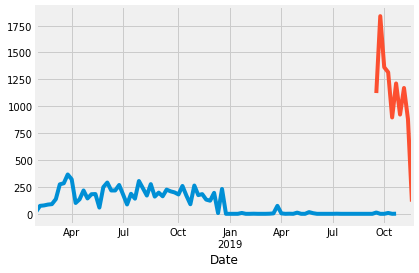

In [45]:
first_cohort.resample('W')['ip_source'].count().plot()
last_cohort.resample('W')['ip_source'].count().plot()
plt.show()

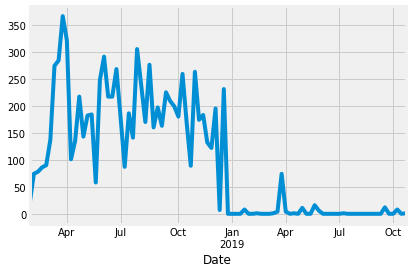

In [75]:
first_cohort.resample('W')['ip_source'].count().plot()

## Maybe Bayes?

In [46]:
#Lets try the third to last. I figure Deimos and Europa would be -2 and -1.
bayes = df[df.number2 == 34]

I think we started with 22 students in Bayes

In [47]:
bayes.number1.nunique()

22

Data for this possible Bayes cohort is consistent with the start date

(2509, 2600)

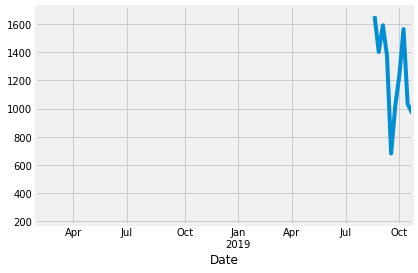

In [48]:
ax = bayes.resample('W')['ip_source'].count().plot()
ax.set_xlim('2018-01-26', '2019-10-26')

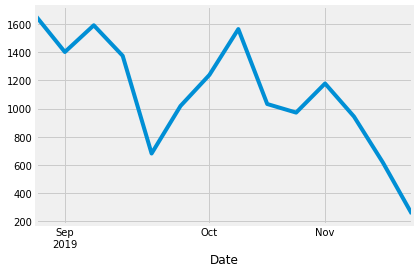

In [49]:
ax = bayes.resample('W')['ip_source'].count().plot()

## Instructors?

In [50]:
df.resource.unique()

array(['/', 'java-ii', 'java-ii/object-oriented-programming', ...,
       '9-timeseries/5.1-modeling-lesson1',
       '9-timeseries/5.2-modeling-lesson2', 'alumni'], dtype=object)

In [51]:
javascript = df[df.resource.str.match('javascript')]

In [52]:
time_series = df[df.resource.str.match('9-timeseries')]

In [53]:
javascript.number1.nunique()

417

In [54]:
time_series.number1.nunique()

35

I'm willing to bet 11, 146, 248 and 1 are instructors

In [55]:
time_series.number1.unique()

array([404,  11, 467, 485, 471, 354, 363, 403, 353, 248, 481, 349, 484,
       476, 479,   1, 429, 469, 478, 146, 369, 351, 361, 483, 468, 480,
       482, 474, 470, 477, 475, 473, 358, 466, 472])

In [56]:
df[df.number1 == 248].head()

,resource,number1,number2,ip_source
Date,,,,
2018-09-05 14:28:23,/,248,1.0,97.105.19.58
2018-09-07 14:53:23,/,248,1.0,97.105.19.58
2018-09-07 14:54:13,html-css,248,1.0,97.105.19.58
2018-09-07 14:56:07,html-css/introduction,248,1.0,97.105.19.58
2018-09-07 14:57:00,html-css/elements,248,1.0,97.105.19.58


In [57]:
df[df.number1 == 248].tail()

,resource,number1,number2,ip_source
Date,,,,
2019-11-19 09:45:31,10-anomaly-detection/exercises,248,28.0,97.105.19.58
2019-11-19 09:45:38,10-anomaly-detection/2-detecting-through-proba...,248,28.0,97.105.19.58
2019-11-19 09:46:05,10-anomaly-detection/3-detecting-timeseries-an...,248,28.0,97.105.19.58
2019-11-19 09:46:09,10-anomaly-detection/4-detecting-with-clustering,248,28.0,97.105.19.58
2019-11-19 09:46:55,10-anomaly-detection/2-detecting-through-proba...,248,28.0,97.105.19.58


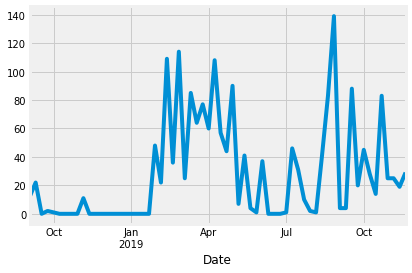

In [69]:
df[df.number1 == 248].resample('W')['ip_source'].count().plot()
plt.show()

Whoever 248 is, they're making requests to the curricullum from the internal traffic address.

In [65]:
df[df.number1 == 1].head()

,resource,number1,number2,ip_source
Date,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 10:40:15,javascript-i/functions,1,8.0,97.105.19.61


In [66]:
df[df.number1 == 1].tail()

,resource,number1,number2,ip_source
Date,,,,
2019-11-18 08:26:01,9-timeseries/4-explore,1,28.0,97.105.19.58
2019-11-18 08:31:34,9-timeseries/project,1,28.0,97.105.19.58
2019-11-19 08:38:11,/,1,28.0,97.105.19.58
2019-11-19 08:38:13,6-regression/1-overview,1,28.0,97.105.19.58
2019-11-19 08:38:17,9-timeseries/project,1,28.0,97.105.19.58


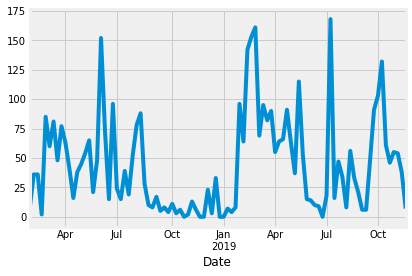

In [68]:
df[df.number1 == 1].resample('W')['ip_source'].count().plot()
plt.show()

Whoever is number 1 took a vacation in the fall of last year.

In [ ]:
test = df['2019-08-29']

In [ ]:
test[test.number2 == 34]

In [ ]:
#I'm rather sure this is geekdom's gateway IP. 
geekdom_connections = df[df.ip_source == '192.171.117.210']

In [ ]:
geekdom_connections['2019-11-17']